In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
train_data = pd.read_csv('Churn_train.csv')

In [3]:
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [5]:
train_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
train_data.Churn.value_counts() / train_data.shape[0]

No     0.730032
Yes    0.269968
Name: Churn, dtype: float64

In [7]:
pr = ProfileReport(train_data)

In [8]:
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

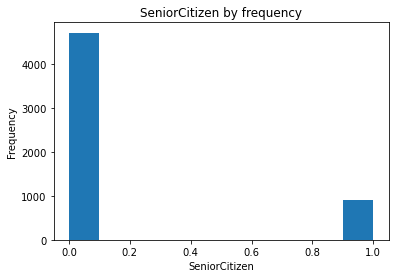

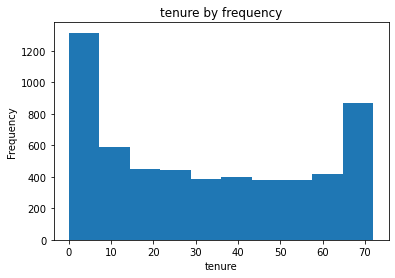

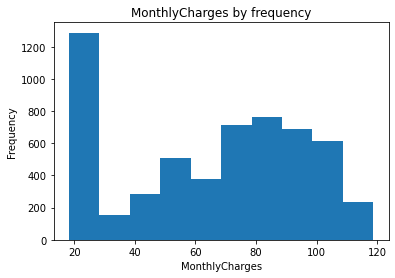

In [9]:
for col in train_data.columns:
    if train_data[col].dtype in ['int64' , 'float64']:
        train_data[col].plot.hist()
        plt.title(f"{col} by frequency")
        plt.xlabel(f"{col}")
        plt.ylabel('Frequency')
        plt.show()

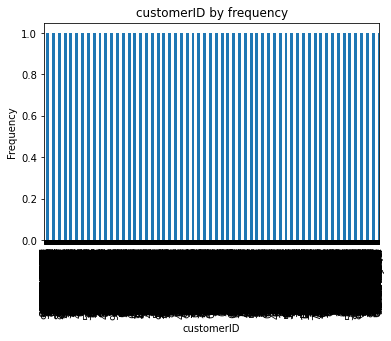

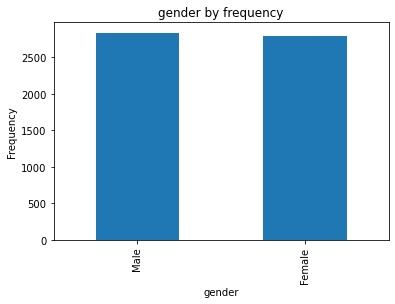

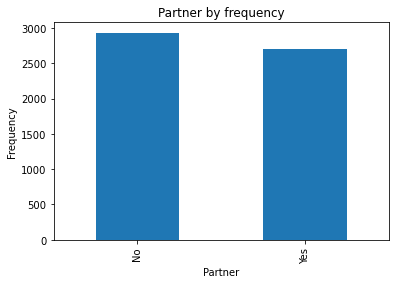

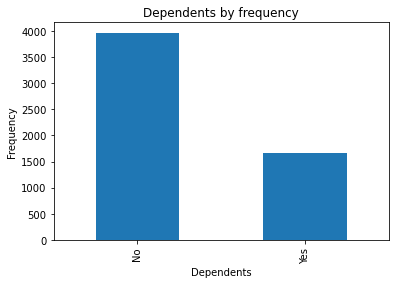

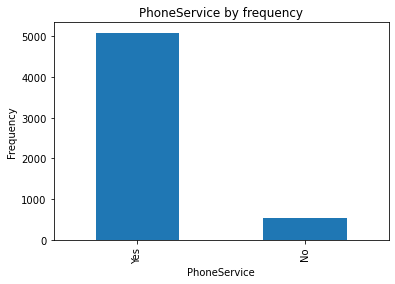

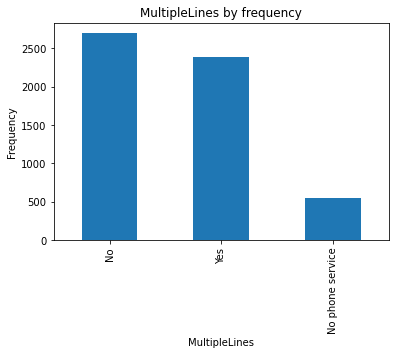

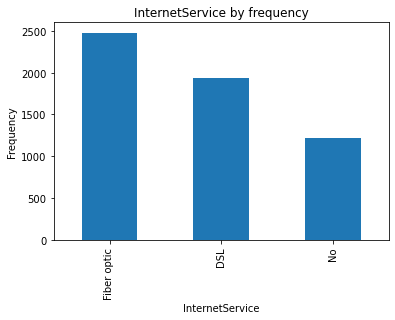

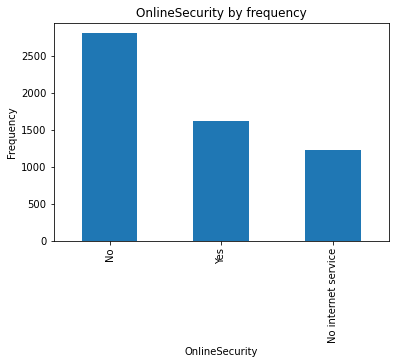

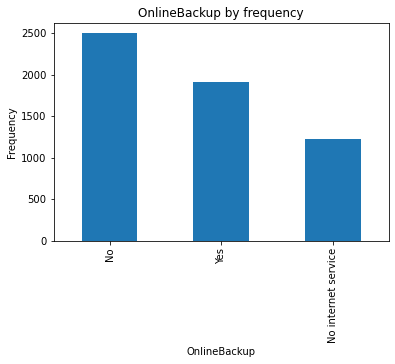

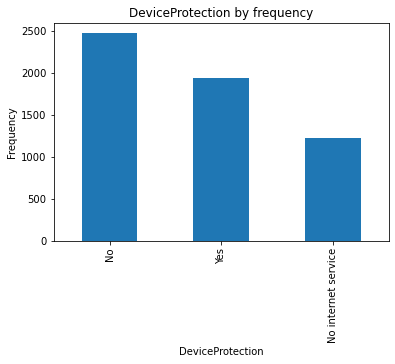

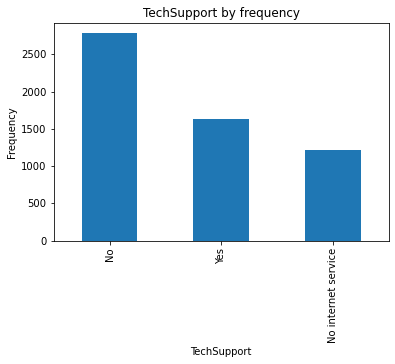

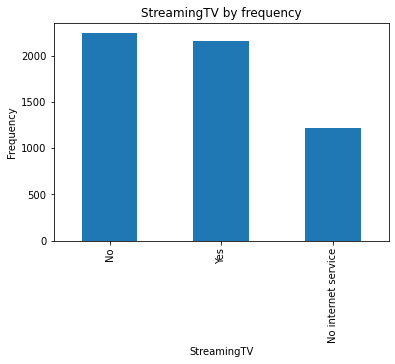

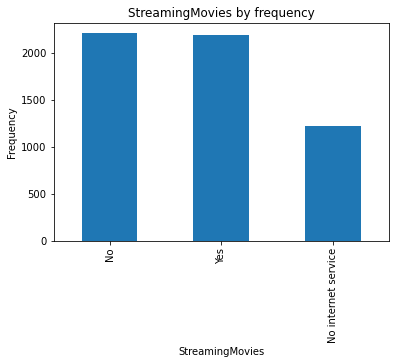

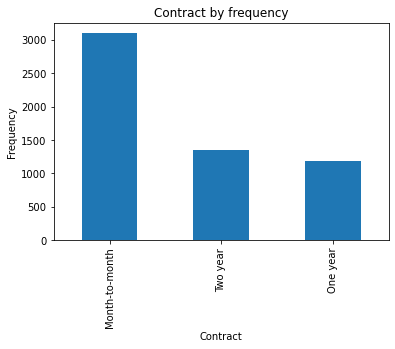

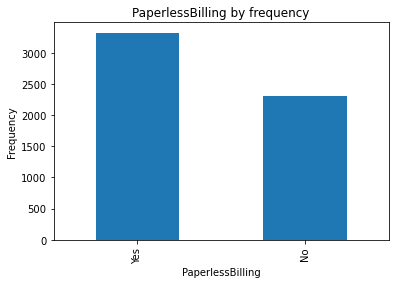

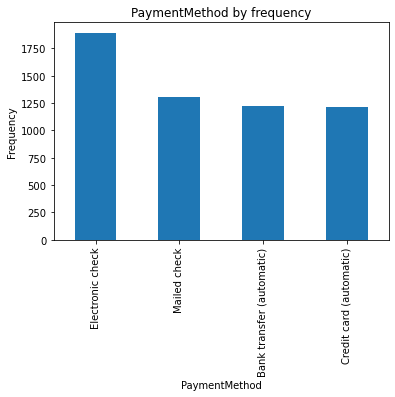

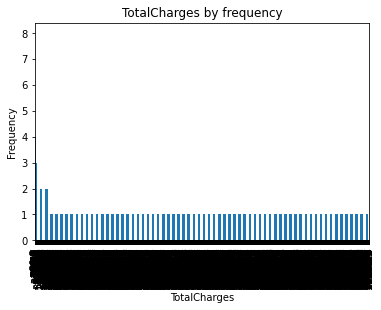

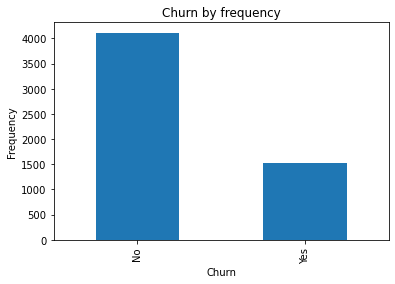

In [52]:
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col].value_counts().plot(kind='bar')
        plt.title(f"{col} by frequency")
        plt.xlabel(f"{col}")
        plt.ylabel('Frequency')
        plt.show()

<AxesSubplot:>

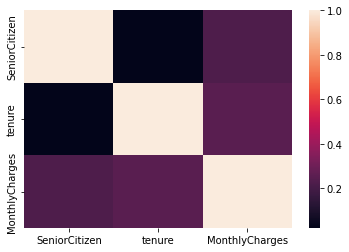

In [54]:
sns.heatmap(train_data.corr())

In [11]:
train_data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.023443,0.225234
tenure,0.023443,1.000000,0.251072
MonthlyCharges,0.225234,0.251072,1.000000


In [72]:
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors = 'coerce')

In [74]:
train_data['TotalCharges'].dtype

dtype('float64')

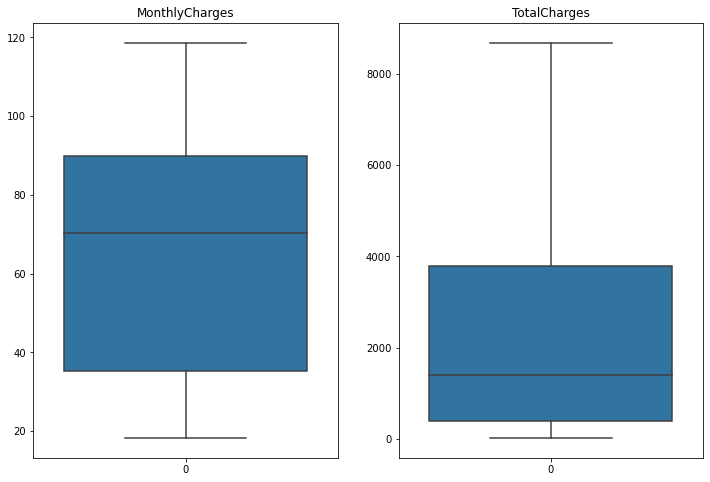

In [82]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (12,8))
sns.boxplot(data=train_data['MonthlyCharges'], ax=ax[0])
sns.boxplot(data=train_data['TotalCharges'], ax=ax[1])
col = [['MonthlyCharges' , 'TotalCharges']]
ax[0].set_title('MonthlyCharges')
ax[1].set_title('TotalCharges')
plt.show()

In [12]:
x_train = train_data.drop(['Churn' , 'customerID'] , axis=1)
y_train = train_data['Churn']

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   object 


In [14]:
le = LabelEncoder()

In [15]:
for col in x_train.columns:
    if x_train[col].dtype == 'object':
        x_train[col] = le.fit_transform(x_train[col])

In [16]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,12,1,0,2,1,1,1,1,1,1,2,0,3,19.70,1798
1,0,0,0,0,42,1,0,0,2,2,2,2,0,2,1,0,1,73.90,2213
2,1,0,1,0,71,1,2,0,2,2,0,2,0,0,2,0,0,65.15,3218
3,1,0,1,1,71,1,2,0,2,0,2,2,2,2,1,0,2,85.45,4128
4,1,0,0,0,30,1,0,0,2,2,0,2,2,0,1,0,2,70.40,1345


In [17]:
lgr = LogisticRegression()

In [18]:
lgr.fit(x_train, y_train)

LogisticRegression()

In [19]:
lgr.coef_

array([[-1.65927234e-01,  2.27724866e-01, -6.48073388e-03,
        -2.08994402e-01, -3.61712726e-02, -5.16035529e-01,
         8.71622848e-02,  1.06034384e-01, -2.90131391e-01,
        -9.29588907e-02, -5.29430836e-02, -2.81822418e-01,
         7.16449662e-02,  1.39431910e-01, -7.79220105e-01,
         2.72562150e-01, -8.96467331e-02,  2.01194966e-02,
         3.52281518e-05]])

In [20]:
test_data = pd.read_csv('Churn_test.csv')

In [21]:
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [22]:
x_test = test_data.drop('customerID' , axis=1)

In [23]:
for col in x_test.columns:
    if x_test[col].dtype == 'object':
        x_test[col] = le.fit_transform(x_test[col])

In [24]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,41,1,0,0,2,0,2,2,2,2,1,1,0,79.85,622
1,0,1,0,0,66,1,2,1,2,0,0,0,2,2,2,1,0,102.40,1082
2,0,0,0,0,12,1,0,0,0,0,0,0,0,0,0,1,0,45.00,921
3,0,0,0,0,5,1,2,0,0,0,0,0,0,0,0,1,3,50.60,480
4,0,0,1,1,10,1,0,0,0,2,2,0,0,2,1,1,3,65.90,1097


In [25]:
y_hat_test = lgr.predict(x_test)
y_hat_train = lgr.predict(x_train)

In [26]:
y_hat_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [27]:
submission = test_data['customerID']

In [28]:
submission['pred'] = y_hat_test

In [29]:
submission.head()

0    8879-ZKJOF
1    0201-MIBOL
2    1600-DILPE
3    8601-QACRS
4    7919-ZODZZ
Name: customerID, dtype: object

In [30]:
test_data['pred'] = y_hat_test

In [31]:
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,pred
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No


In [32]:
sub_final = test_data[['customerID' , 'pred']]

In [33]:
sub_final

,customerID,pred
0,8879-ZKJOF,No
1,0201-MIBOL,No
2,1600-DILPE,No
3,8601-QACRS,Yes
4,7919-ZODZZ,No
...,...,...
1404,5130-IEKQT,Yes
1405,4452-ROHMO,No
1406,6164-HAQTX,No
1407,3982-DQLUS,No


In [34]:
score = accuracy_score(y_train, y_hat_train)

In [35]:
print(f"The accuracy score of train set is {score}")

The accuracy score of train set is 0.7996095136670217


In [36]:
sub_final.to_csv('submission.csv', index = False, header = False)

In [37]:
report = classification_report(y_train, y_hat_train)
print(report)

              precision    recall  f1-score   support

          No       0.84      0.89      0.87      4113
         Yes       0.66      0.54      0.59      1521

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634



In [38]:
con_mat = confusion_matrix(y_train, y_hat_train)

In [39]:
con_mat

array([[3678,  435],
       [ 694,  827]], dtype=int64)

In [40]:
y_train.value_counts()

No     4113
Yes    1521
Name: Churn, dtype: int64

In [41]:
y_pred = pd.DataFrame(y_hat_train)

In [42]:
y_pred.value_counts()

No     4372
Yes    1262
dtype: int64

In [43]:
3678+694

4372

In [44]:
435+827

1262

In [45]:
cm = pd.DataFrame(con_mat)
cm.index = ['Actual-No','Actual-Yes']
cm.columns = ['Pred-No','Pred-Yes']
print(cm)

            Pred-No  Pred-Yes
Actual-No      3678       435
Actual-Yes      694       827


In [83]:
print(f"The accuracy score of train set is {score}")

The accuracy score of train set is 0.7996095136670217
